In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import os
import random

In [3]:
#Custom!!
NAME = "ensemble"

In [6]:
classes = ["General trash","Paper","Paper pack","Metal","Glass","Plastic","Styrofoam","Plastic bag","Battery","Clothing"]
# path = os.path.join("output",NAME, "submission_ensemble.csv")
path = os.path.join("..",NAME, "submission_ensemble.csv")
df = pd.read_csv(path)
print(df)

      Unnamed: 0                                   PredictionString  \
0              0  0 0.463623046875 329.0 639.0 353.5 684.0 0 0.1...   
1              1  0 0.9185728 639.45764 650.6711 686.5364 842.73...   
2              2  0 0.98620677 879.96924 465.70215 1022.846 633....   
3              3  0 0.4774469 15.631569 0.73934937 997.06665 325...   
4              4  0 0.9521673 438.55453 408.86212 650.3795 566.6...   
...          ...                                                ...   
4866        4866  0 0.9981838 295.21564 352.7124 668.4304 689.47...   
4867        4867  0 0.8819865 628.3184 669.48303 778.41644 720.7...   
4868        4868  0 0.24472001 544.78204 538.4989 673.9942 763.4...   
4869        4869  0 0.9917255 5.0431747 236.3516 1019.61383 936....   
4870        4870  0 0.42967525 239.79868 822.62317 290.46857 853...   

           image_id  
0     test/0000.jpg  
1     test/0001.jpg  
2     test/0002.jpg  
3     test/0003.jpg  
4     test/0004.jpg  
...            

In [9]:
def getImage(imageNum):
	
	# predict, imagePath = df.iloc[imageNum]
	_, predict, imagePath = df.iloc[imageNum]

	objectList = getObjectFromPredict(predict)
	image = readImage(imagePath)
	drawnImage = drawObjectInImage(image, objectList)
	return drawnImage
	
def getObjectFromPredict(predict):
	predictList = predict.split()

	objectList = []
	for i in range(0,len(predictList),6):
		imageDict = {}
		imageDict["class"] = classes[int(predictList[i])]
		imageDict["confidence"] = predictList[i+1]
		imageDict["x1"] = float(predictList[i+2])
		imageDict["y1"] = float(predictList[i+3])
		imageDict["x2"] = float(predictList[i+4])
		imageDict["y2"] = float(predictList[i+5])
		objectList.append(imageDict)
	
	return objectList

def readImage(imagePath):
	return Image.open(os.path.join("dataset",imagePath))

def drawObjectInImage(image, objectList):
	draw = ImageDraw.Draw(image)

	for obj in objectList:
		x1, y1, x2, y2 = obj["x1"], obj["y1"], obj["x2"], obj["y2"]
		draw.rectangle(((x1,y1),(x2,y2)),width=3 ,outline=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))

		imageFont = ImageFont.load_default()
		text = obj["class"] + "  " + obj["confidence"]
		text_width, text_height = imageFont.getsize(text)
		draw.rectangle(((x1, y1), (x1 + text_width, y1 + text_height)), fill=(0, 0, 0))
		draw.text((x1, y1), text, font=imageFont, fill=(255, 255, 255))

	return image

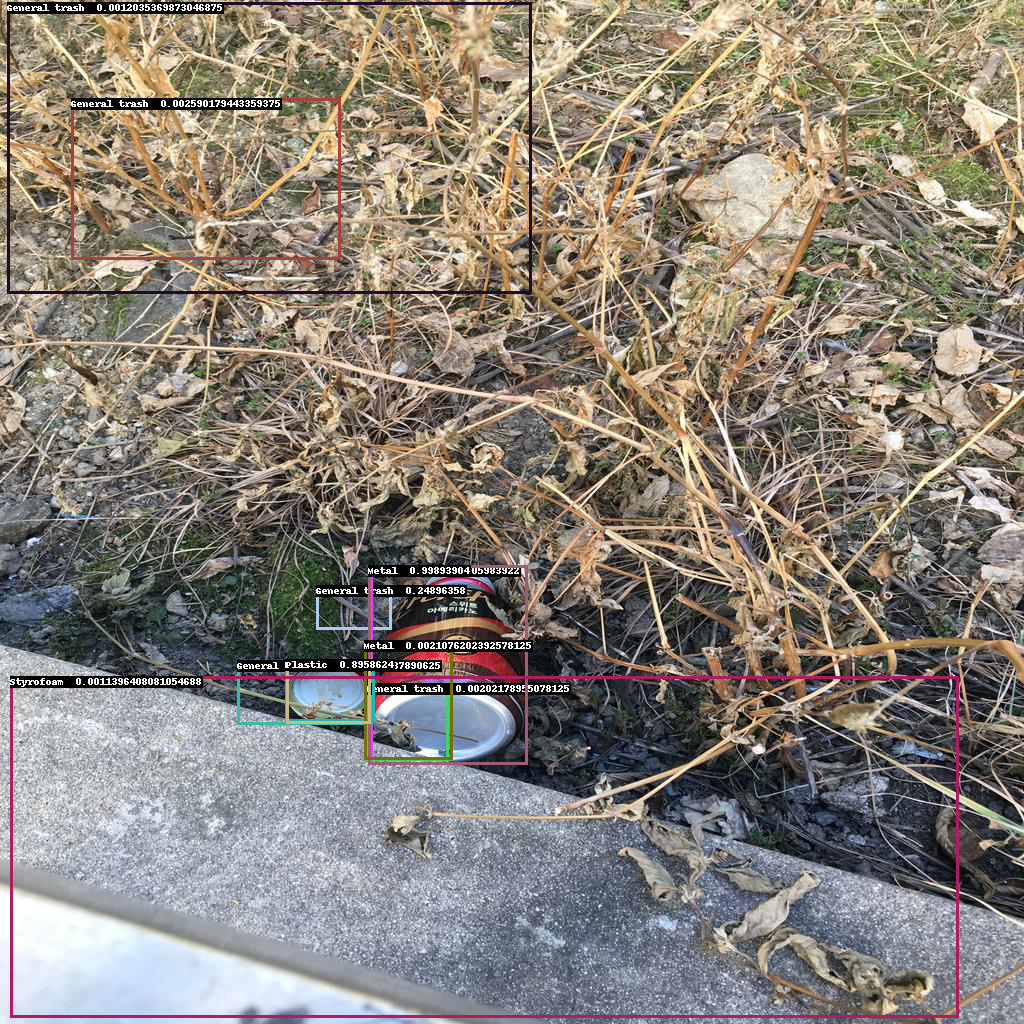

In [14]:
getImage(1112)